# 绘制数据集的分布图
单变量或双变量的分布的可视化问题

# 目录
+ 绘制单变量分布图
    + 直方图
    + 核密度图
        + 核密度图的绘制过程
        + sns.kdeplot()
            + shadow参数
            + bw参数
            + cut参数
    + 拟合参数分布


+ 绘制双变量分布图
    + 散点图
    + 六边形图
    + 核密度图
        + sns.kdeplot()
        + 连续化核密度图
    + JointGrid对象


+ 可视化数据集的成对关系
    + PairGrid对象

In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
%matplotlib inline

## 绘制单变量分布图
sns.distplot()函数，默认同时绘制直方图（histogram）和核密度图（KDE）

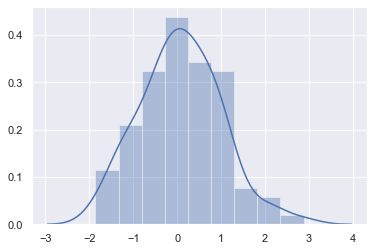

In [2]:
x = np.random.normal(size=100)
sns.distplot(x)

### 直方图

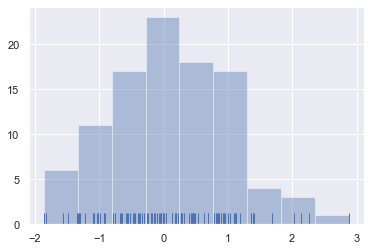

In [3]:
# kde=False绘制直方图，rug=True为每个观察值添加一个tick
sns.distplot(x, kde=False, rug=True) 

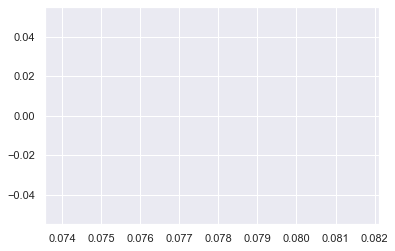

In [4]:
# 绘制rugplot，有单独的sns.rugplot()函数
sns.distplot(x, kde=False, hist=False, rug=True) 

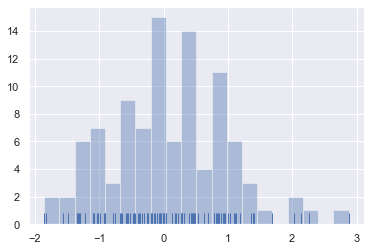

In [5]:
sns.distplot(x, bins=20, kde=False, rug=True) # bins参数，设置bin的个数

### 核密度图

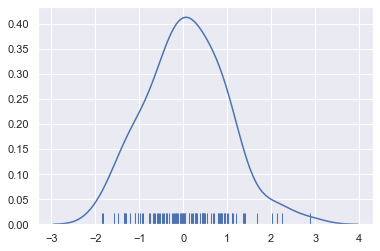

In [6]:
# 设置hist=False，绘制核密度图，有单独的sns.kdeplot()函数
sns.distplot(x, hist=False, rug=True) 

#### 核密度图的绘制过程

##### 第一步
each observation is first replaced with a normal (Gaussian) curve centered at that value

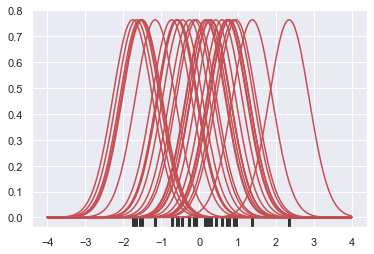

In [7]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3)

##### 第二步
these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1

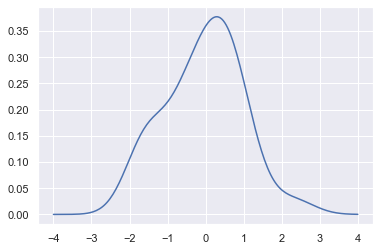

In [8]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density)

#### sns.kdeplot()
相对于sns.distplot()能够设置更多选项

##### shadow参数

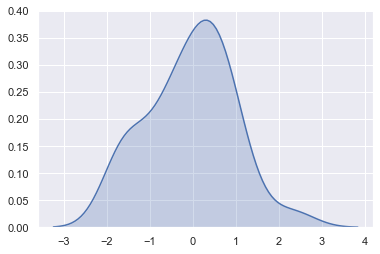

In [9]:
# 设置shade参数，填充核密度线下方区域
sns.kdeplot(x, shade=True) 

##### bw参数
The bandwidth (``bw``) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram.  

It corresponds to the width of the kernels we plotted above.  

The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values.

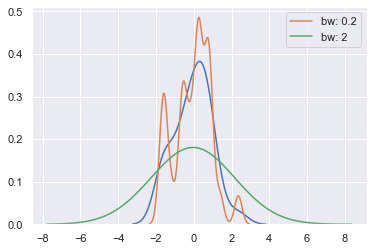

In [10]:
# 默认bw='scott'
sns.kdeplot(x) 
# 设置bw参数
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2") 
plt.legend()

##### cut参数
As you can see above, the nature of the Gaussian KDE process means that estimation extends past the largest and smallest values in the dataset.  


It's possible to control how far past the extreme values the curve is drawn with the ``cut`` parameter.  


However, this only influences how the curve is drawn and not how it is fit.

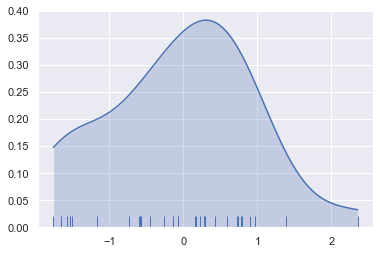

In [11]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x)

### 拟合参数分布（Fitting parametric distributions）
You can also use distplot() to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data.

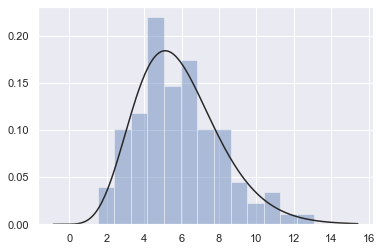

In [12]:
x = np.random.gamma(6, size=200)
# 设置fit参数，拟合参数分布
sns.distplot(x, kde=False, fit=stats.gamma) 

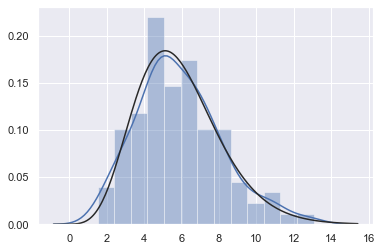

In [13]:
# 绘制直方图和核密度图，与拟合参数分布图对比
sns.distplot(x, fit=stats.gamma) 

## 绘制双变量分布图
sns.jointplot()函数

In [14]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

### 散点图（scatterplot）
jointplot()默认绘制散点图

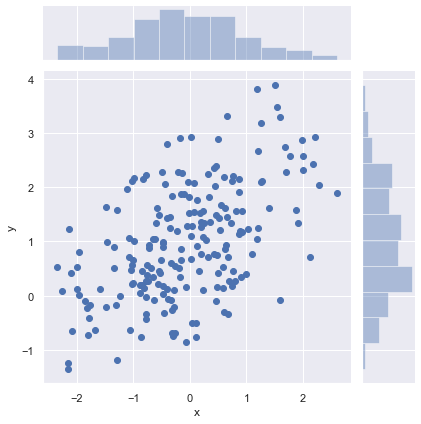

In [15]:
# 注意Seaborn与DataFrame联合使用，data参数指定DataFrame，x、y参数指定列名
sns.jointplot(x="x", y="y", data=df) 

### 六边形图（hexbin plot）
六边形颜色的深浅，代表落入该六边形区域内观测点的数量，常应用于大数据集，与white主题结合使用效果最好

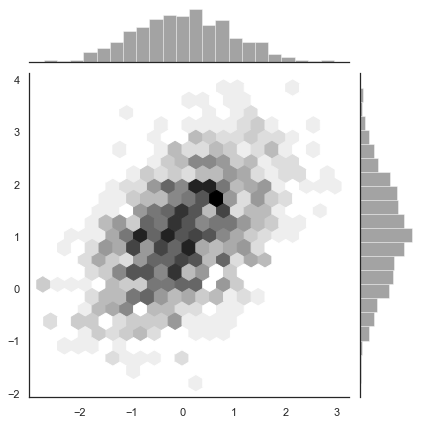

In [16]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
# hexbin plot与white主题结合使用效果最好
with sns.axes_style("white"): 
    # kind参数设置六边形图，颜色设置与matplotlib相同
    sns.jointplot(x=x, y=y, kind="hex", color="k")

### 核密度图（kernel density estimation）

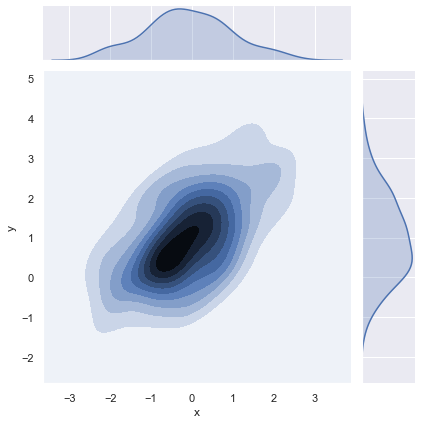

In [17]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

#### sns.kdeplot()
sns.kdeplot()也可以绘制双变量核密度图  

sns.kdeplot()可以绘制在指定坐标系内，而sns.jointplot()只能单独绘制，无法添加在其他图表之上

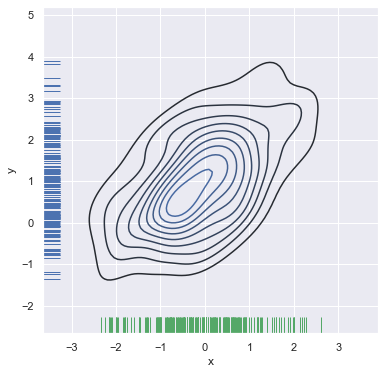

In [18]:
f, ax = plt.subplots(figsize=(6, 6))
# ax参数选择图表绘制在哪个坐标系内
sns.kdeplot(df.x, df.y, ax=ax) 
sns.rugplot(df.x, color="g", ax=ax)
# kdeplot()绘制的双变量核密度图，可以与其他图表叠加在同一个坐标系内
sns.rugplot(df.y, vertical=True, ax=ax) 

#### 连续化核密度图

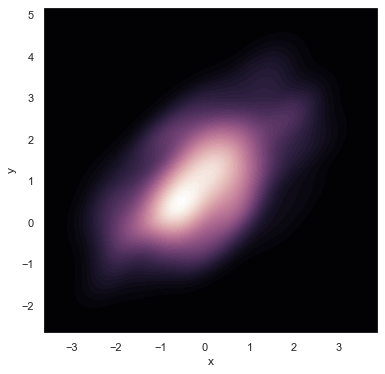

In [19]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
# 通过n_levels参数，增加轮廓线的数量，达到连续化核密度图的效果
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True) 

### JointGrid对象
sns.jointplot()绘制后返回JointGrid对象，可以通过JointGrid对象来修改图表，例如添加图层或修改其他效果

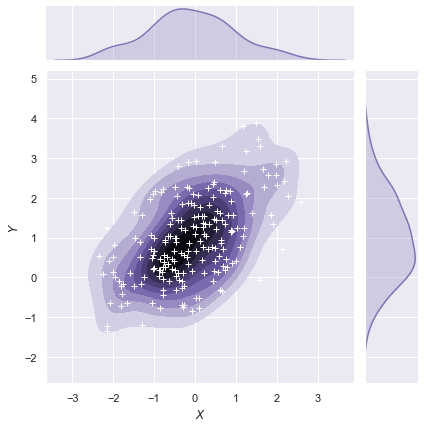

In [20]:
 # 生成JointGrid对象
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")

## 可视化数据集的成对关系
sns.pairplot()

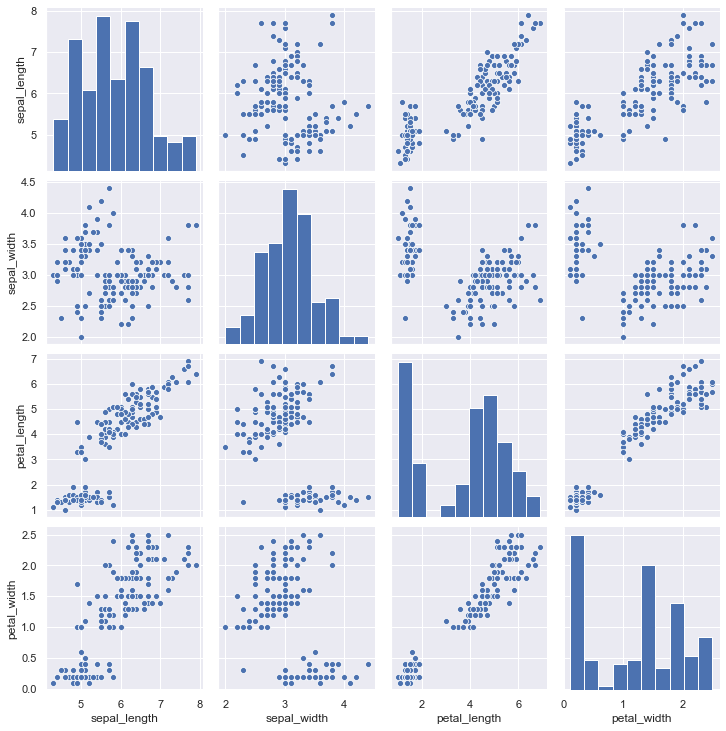

In [21]:
iris = sns.load_dataset("iris")
sns.pairplot(iris) # 默认在对角线上绘制单变量的直方图

### PairGrid对象

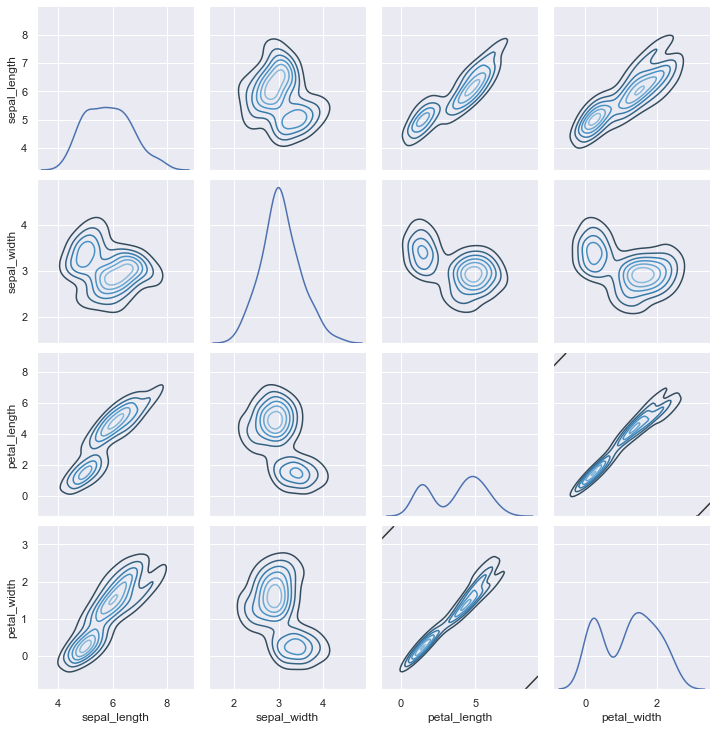

In [22]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)